In [336]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from numpy import *
d2r = np.deg2rad
r2d = np.degrees

In [337]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [338]:
from sympy.physics.mechanics import dynamicsymbols

### Parámetros DH

In [339]:
theta, alpha, a, d = dynamicsymbols('theta alpha a d')
theta, alpha, a, d 

(theta, alpha, a, d)

### Parámetros del robot

In [340]:
theta1, theta2, theta3 = dynamicsymbols('theta1 theta2 theta3')
theta1, theta2, theta3

(theta1, theta2, theta3)

### Tabla DH
| $i$ | $\alpha_i$ | $a_i$ | $d_i$ | $\theta_i$ |
|:-:|:-------:|:---:|:---:|:-------:|
| 1 |    0    |  $l_1$ |  0  | $\theta_1$ |
| 2 |    0    |  $l_2$ |  0  | $\theta_2$ |

| $i$ | $\theta_i$ | $d_i$ | $a_i$ | $\alpha_i$ |
|:-:|:------------:|:-----:|:-----:|:----------:|
| 1 | $\theta_1*$  | 0     | $l_1$ | 0          |
| 2 | $\theta_2*$  | 0     | $l_2$ | 0          |

$i$: número del enlace, $\alpha_i$: ángulo de torsión, $a_i$: longitud del enlace $i$, $d_i$: offset de la articulación y $\theta_i$: ángulo de articulación. 

In [341]:
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

In [342]:
d1 = 1.2
a2 = 0.5
a3 = 0.3

In [343]:
m01 = m.subs({theta:theta1, d:d1, a:0 , alpha:-pi/2})
m01

Matrix([
[cos(theta1), -6.12323399573677e-17*sin(theta1),     -1.0*sin(theta1),   0],
[sin(theta1),  6.12323399573677e-17*cos(theta1),      1.0*cos(theta1),   0],
[          0,                              -1.0, 6.12323399573677e-17, 1.2],
[          0,                                 0,                    0,   1]])

In [344]:
m12 = m.subs({theta:theta2, d:0, a:a2, alpha:0})
m12

Matrix([
[cos(theta2), -sin(theta2), 0, 0.5*cos(theta2)],
[sin(theta2),  cos(theta2), 0, 0.5*sin(theta2)],
[          0,            0, 1,               0],
[          0,            0, 0,               1]])

In [345]:
m23 = m.subs({theta:theta3, d:0, a:a3 , alpha:0})
m23

Matrix([
[cos(theta3), -sin(theta3), 0, 0.3*cos(theta3)],
[sin(theta3),  cos(theta3), 0, 0.3*sin(theta3)],
[          0,            0, 1,               0],
[          0,            0, 0,               1]])

In [346]:
m03 = (m01*m12*m23)
m03

Matrix([
[(-6.12323399573677e-17*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + (-6.12323399573677e-17*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*sin(theta3), -(-6.12323399573677e-17*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3) + (-6.12323399573677e-17*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*cos(theta3),     -1.0*sin(theta1), 0.3*(-6.12323399573677e-17*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + 0.3*(-6.12323399573677e-17*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*sin(theta3) - 3.06161699786838e-17*sin(theta1)*sin(theta2) + 0.5*cos(theta1)*cos(theta2)],
[ (-sin(theta1)*sin(theta2) + 6.12323399573677e-17*cos(theta1)*cos(theta2))*sin(theta3) + (sin(theta1)*cos(theta2) + 6.12323399573677e-17*sin(theta2)*cos(theta1))*cos(theta3),   (-sin(theta1)*sin(theta2) + 6.12323399573677e-17*cos(theta1)*cos(theta2))*cos(theta3) - (sin(theta1)*cos(theta2) + 6.12323399573677e-17*sin(theta2)*cos(theta1))*sin(theta3),     

In [347]:
# mbee= sp.Matrix([[m02[0,0].simplify(), m02[0,1].simplify(), sp.trigsimp(m02[0,3].simplify())],
#                  [m02[1,0].simplify(), m02[1,1].simplify(), sp.trigsimp(m02[1,3].simplify())],
#                  [m02[2,0].simplify(), m02[2,1].simplify(), m02[2,2].simplify()]])

mtcp = sp.simplify(m03)
mtcp

Matrix([
[1.0*cos(theta2 + theta3)*cos(theta1), -1.0*sin(theta2 + theta3)*cos(theta1),     -1.0*sin(theta1), -3.06161699786838e-17*sin(theta1)*sin(theta2) + 0.3*cos(theta2 + theta3)*cos(theta1) + 0.5*cos(theta1)*cos(theta2)],
[1.0*sin(theta1)*cos(theta2 + theta3), -1.0*sin(theta2 + theta3)*sin(theta1),      1.0*cos(theta1),  0.3*sin(theta1)*cos(theta2 + theta3) + 0.5*sin(theta1)*cos(theta2) + 3.06161699786838e-17*sin(theta2)*cos(theta1)],
[           -1.0*sin(theta2 + theta3),             -1.0*cos(theta2 + theta3), 6.12323399573677e-17,                                                                  -0.3*sin(theta2 + theta3) - 0.5*sin(theta2) + 1.2],
[                                   0,                                     0,                    0,                                                                                                                  1]])

In [348]:
px = mtcp[0,3]
py = mtcp[1,3]
pz = mtcp[2,3]

In [349]:
py

0.3*sin(theta1)*cos(theta2 + theta3) + 0.5*sin(theta1)*cos(theta2) + 3.06161699786838e-17*sin(theta2)*cos(theta1)

In [350]:
fx = sp.lambdify((theta1, theta2, theta3), px, 'numpy')
fy = sp.lambdify((theta1, theta2, theta3), py, 'numpy')
fz = sp.lambdify((theta1, theta2, theta3), pz, 'numpy')

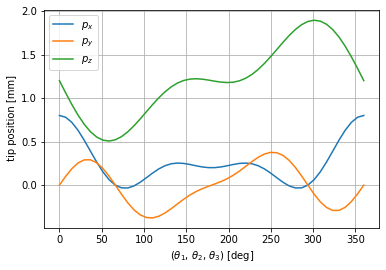

In [351]:
theta1s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2
theta3s = np.linspace(d2r(0), d2r(360))

zx = np.array(fx(theta1s, theta2s, theta3s))
zy = np.array(fy(theta1s, theta2s, theta3s))
zz = np.array(fz(theta1s, theta2s, theta3s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.plot(np.rad2deg(theta1s), zz, label = r'$p_z$')
ax1.set_xlabel(r'($\theta_1$, $\theta_2$, $\theta_3$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()

### Ploteo del área del trabajo del robot

In [352]:
n_theta = 32

theta1s = np.linspace(d2r(0), d2r(360), n_theta) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(60), n_theta) # desired range of motion for joint 2
theta3s = np.linspace(d2r(0), d2r(60), n_theta) # desired range of motion for joint 3

# theta2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2
total = len(theta1s)*len(theta2s)*len(theta3s)
print(total)

32768


In [353]:
posx = []
posy = []
posz = []

counter = 0

for theta1 in theta1s:
        for theta2 in theta2s:
            for theta3 in theta3s:
                x = float(fx(theta1, theta2, theta3))
                y = float(fy(theta1, theta2, theta3))
                z = float(fz(theta1, theta2, theta3))
                posx.append(x)
                posy.append(y)
                posz.append(z)
#                 y = fy(l1,l2,theta1,theta2)
x = np.array(posx)
y = np.array(posy)
z = np.array(posz)

In [381]:
%%time
import plotly.graph_objects as go

# Helix equation
# x = np.array(posx)
# y = np.array(posy)
# z = np.array(posz)
# t = np.linspace(0, 10, 50)
# x, y, z = np.cos(t), np.sin(t), t

# fig = go.Figure(data=[go.Scatter3d(
#     x=x, 
#     y=y, 
#     z=z)])

fig = go.Figure(data=[go.Scatter3d(
    x=x, 
    y=y, 
    z=z,
    mode='markers', 
    opacity=0.025,  
    marker=dict(
        symbol="circle",
        size=3,
        color='rgb(225, 130, 0)',
        line=dict(
            color='rgb(0, 0, 0)',
            width=3
        )
    ))])

# fig.add_trace(go.Scatter3d(
#     x=[x_target], 
#     y=[y_target], 
#     z=[z_target],
#     mode='markers', 
#     marker=dict(
#         symbol='x',
#         size=5,
#         color='rgb(40,40,40)'
#     )))

# fig.add_trace(go.Scatter3d(
#     x=[x_best], 
#     y=[y_best], 
#     z=[z_best],
#     mode='markers', 
#     marker=dict(
#         symbol='x',
#         size=5,
#         color='rgb(40,40,40)'
#     )))

fig.show()

Wall time: 1.44 s


In [355]:
# Obtener punto valuando los parámetros
def f(param):
    p0 = param[0]
    p1 = param[1]
    p2 = param[2]
    
    point = []
    point = ([fx(p0, p1, p2),
              fy(p0, p1, p2),
              fz(p0, p1, p2)])
    
    return np.array(point)

# Distancia euclidiana
def distance(p1, p2):
    dist = np.linalg.norm(p1-p2)
    return dist

# Gradiente
def g(plus, minus, target):
    grad = distance(f(plus),target) - distance(f(minus),target)
    return grad

# Función auxiliar gradiente
def repeatRows(mylist, param):
    for i in range(len(mylist)):
        mylist[i] = param
    minplus = np.array(mylist)
    return minplus

In [451]:
# Punto objetivo
target_param = [d2r(270.0), d2r(45.0), d2r(0.0)]
target = f(target_param)
x_target = target[0]
y_target = target[1]
z_target = target[2]
print(target_param)
print(target)

[4.71238898038469, 0.7853981633974483, 0.0]
[-8.22658253e-17 -5.65685425e-01  6.34314575e-01]


### Descenso de gradiente

In [426]:
err = 0.001
lr = 0.1e-7

rows = 2
cols = len(param)
mylist = [[0 for x in range(cols)] for x in range(rows)]

grad = [None] * 4
best_param = [None] * 4

minplus = repeatRows(mylist, param)

t1 = d2r(180.0)
t2 = d2r(15.0)
t3 = d2r(20.0)

param = np.array([t1, t2, t3])

print('old param: ', param)
print('old point: ', f(param))
print('old distance: {} '.format(distance(f(param),target)))

minplus = repeatRows(mylist, param)

iter = 0

points = []
new_err = 100.0
actual_err = 100.0

err = []
temp_param = []

while iter < 25000:
#     lr = random.uniform(1e-5,1e-7)
    for i in range(cols):
        for j in range(rows):
            # Plus
            if(j%2==0):
                minplus[j][i] += lr
            # Minus
            else:
                minplus[j][i] -= lr

        grad[i] = g(minplus[0], minplus[1], target)
        param[i] -= grad[i]

    iter += 1
    
    old_err = new_err
    new_err = distance(f(param),target)
    
    points.append(f(param))
    if new_err<actual_err:
        actual_err = new_err
        err.append(actual_err)
#         best_param = param
        temp_param.append(param)
    
#     if new_err<0.27:
#         break
        
    if abs(param[0]) > 2*pi or param[1] > 0.16*pi or param[2] > 0.16*pi:
        break
#     if(new_err<old_err):
#         temp_param = param
#     if(new_err>old_err):
#         break
#     if iter%100 == 0:
#         print(err)
    if iter%200 == 0:
        print('new err: {}'.format(new_err))
        print('new param: ', param)
        print('old err: {}'.format(old_err))

points = np.array(points)
print('new param: ', param)
print('target param: ', target_param)
print('target point: ', target)
print('new point: ', f(param))
print('new distance: {} '.format(new_err))

print('l1 distance: {} '.format(np.linalg.norm(f(param)-f(target_param))))

old param:  [3.14159265 0.26179939 0.34906585]
old point:  [-7.28708526e-01  8.13170086e-17  8.98517547e-01]
old distance: 1.356057767091114 
new err: 1.356033970623965
new param:  [3.14168795 0.26189595 0.3491631 ]
old err: 1.356034206155016
new err: 1.355963277897237
new param:  [3.1419768  0.26218606 0.3494539 ]
old err: 1.3559637482778781
new err: 1.355845498172915
new param:  [3.14245918 0.2626697  0.34993823]
old err: 1.3558462046737931
new err: 1.355680313259262
new param:  [3.1431351  0.26334688 0.35061611]
old err: 1.3556812577885644
new err: 1.3554672773853775
new param:  [3.14400456 0.26421761 0.35148752]
old err: 1.3554684624895792
new err: 1.3552058170277608
new param:  [3.14506756 0.26528187 0.35255248]
old err: 1.3552072458926083
new err: 1.3548952306911775
new param:  [3.14632411 0.26653968 0.35381097]
old err: 1.3548969071428925
new err: 1.3545346886467728
new param:  [3.14777419 0.26799102 0.35526301]
old err: 1.3545366171534636
new err: 1.354123232631033
new param:  

In [ ]:
index_min = np.argmin(err)
best_param = temp_param[index_min]
print(f(best_param), target)

### Barrido de fuerza bruta

In [424]:
%%time

n_theta = 36

theta1s = np.linspace(d2r(0), d2r(360), n_theta) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(60), n_theta) # desired range of motion for joint 2
theta3s = np.linspace(d2r(0), d2r(60), n_theta) # desired range of motion for joint 3

# theta2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2
total = len(theta1s)*len(theta2s)*len(theta3s)
print(total)

params = np.array([theta1s, theta2s, theta3s])

points = []

counter = 0
actual_err = 100
required_err = 0.025

for theta1 in theta1s:
        for theta2 in theta2s:
            for theta3 in theta3s:
                point = (fx(theta1, theta2, theta3),
                         fy(theta1, theta2, theta3),
                         fz(theta1, theta2, theta3))
                new_err = distance(point, target)
                counter += 1
                if new_err<required_err:
                    break
                if new_err<actual_err:
                    actual_err = new_err
                    best_param = [theta1, theta2, theta3]
#                 if counter & 5000 == 0:
#                     print('new_err', new_err)    

#                          fy(theta1, theta2, theta3),
#                          fz(theta1, theta2, theta3))
    
print(actual_err)
print(counter)

46656
0.026397523847726277
46452
Wall time: 2.7 s


### Barrido mezclado por fuerza bruta con condición de error

In [460]:
%%time

params = []

n_theta = 36

theta1s = np.linspace(d2r(0), d2r(360), n_theta) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(60), n_theta) # desired range of motion for joint 2
theta3s = np.linspace(d2r(0), d2r(60), n_theta) # desired range of motion for joint 3

for theta1 in theta1s:
        for theta2 in theta2s:
            for theta3 in theta3s:
                params.append([theta1, theta2, theta3])

params = np.array(params)
np.random.shuffle(params)

actual_err = 100
required_err = 0.04

counter = 0

points = []

for param in params:
    points.append(f(param))
    new_err = distance(f(param), target)
    counter += 1
    if new_err<actual_err:
        actual_err = new_err
        best_param = param
    if new_err<required_err:
        break

Wall time: 593 ms


In [461]:
# Setear mejores puntos para el ploteo
best = f(best_param)
x_best = best[0]
y_best = best[1]
z_best = best[2]

points = np.array(points)

print(counter)
print('error actual:', actual_err)
print('parametros:', r2d(best_param))
print('target:', target)
print('achieved:',f(best_param))

336
error actual: 0.03228574931830742
parametros: [267.42857143  36.          25.71428571]
target: [-8.22658253e-17 -5.65685425e-01  6.34314575e-01]
achieved: [-0.02452622 -0.54611864  0.64192871]


In [462]:
import plotly.graph_objects as go

x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = go.Figure(data=[go.Scatter3d(
    x=x, 
    y=y, 
    z=z,
    mode='markers', 
    opacity=0.3,
    marker=dict(
        symbol="circle",
        size=3,
        color='rgb(225, 130, 0)',
        line=dict(
            color='rgb(0, 0, 0)',
            width=3
        )
    ))])

fig.add_trace(go.Scatter3d(
    x=[x_target], 
    y=[y_target], 
    z=[z_target],
    mode='markers', 
    marker=dict(
        symbol='x',
        size=5,
        color='rgb(40,40,40)'
    )))

fig.add_trace(go.Scatter3d(
    x=[x_best], 
    y=[y_best], 
    z=[z_best],
    mode='markers', 
    marker=dict(
        symbol='diamond',
        size=5,
        color='rgb(40,40,40)'
    )))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()